In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2025-03-24 17:53:04.945949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
tf.__version__


'2.19.0'

### Problem Statement
Customer churn is a critical issue in the banking industry, affecting revenue and long-term profitability. Given a dataset containing customer demographic details, financial information, and banking activity, the objective is to develop a machine learning model that predicts whether a customer will leave the bank (churn) or stay.

By analyzing features such as credit score, geography, age, tenure, account balance, number of products used, credit card ownership, membership activity, and estimated salary, the model can help the bank identify at-risk customers and take proactive measures to improve retention.

The goal is to improve customer retention strategies, optimize marketing efforts, and enhance customer satisfaction by targeting customers likely to churn.

In [27]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
# Split the dataset into independent and dependent features
X = dataset.iloc[:,3:-1]
y = dataset.iloc[:, 13]

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
# Feature engineering
geography=pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
X = X.drop(['Geography', 'Gender'], axis=True)

KeyError: "['Geography', 'Gender'] not found in axis"

In [34]:
X=pd.concat([X, geography, gender], axis=1)

In [35]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [37]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [40]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [42]:
X_train.shape

(8000, 11)

In [44]:
# Create the ANN
# Importing the necessary modules from TensorFlow Keras

# Sequential: This is a linear stack of layers where you can add layers one after another.
from tensorflow.keras.models import Sequential  

# Dense: This is a fully connected (dense) layer, meaning every neuron is connected to all neurons in the previous layer.
from tensorflow.keras.layers import Dense  

# Activation Functions:
# - LeakyReLU: A variation of ReLU that allows small gradients for negative inputs.
# - PReLU: Parametric ReLU, where the negative slope is learned during training.
# - ELU: Exponential Linear Unit, which smoothens negative values and helps in training deep networks.
# - ReLU: The most commonly used activation function, which sets negative values to zero.
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU  

# Dropout: A regularization technique that randomly drops a fraction of neurons during training to prevent overfitting.
from tensorflow.keras.layers import Dropout  


In [45]:
# Initialize the ANN
classifier = Sequential()
# Add input layer
classifier.add(Dense(units=11, activation='relu'))
# Add the first hidden layer
classifier.add(Dense(units=6, activation='relu'))
# Add the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
# Add the output layer
classifier.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Early stopping - when the accuracy of the model is not increasing, automatically the training stops

early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [51]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8664 - loss: 0.3258 - val_accuracy: 0.8485 - val_loss: 0.3692
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8643 - loss: 0.3256 - val_accuracy: 0.8455 - val_loss: 0.3716
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8676 - loss: 0.3288 - val_accuracy: 0.8493 - val_loss: 0.3704
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8705 - loss: 0.3152 - val_accuracy: 0.8455 - val_loss: 0.3690
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8640 - loss: 0.3201 - val_accuracy: 0.8463 - val_loss: 0.3713
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8673 - loss: 0.3286 - val_accuracy: 0.8440 - val_loss: 0.3725
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.3052 - val_accuracy: 0.8436 - val_loss: 0.3702
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8652 - loss: 0.3133 - 

In [52]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

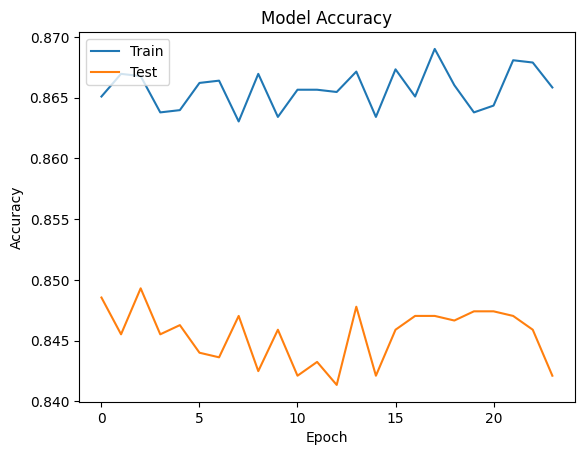

In [53]:
# Plot the summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

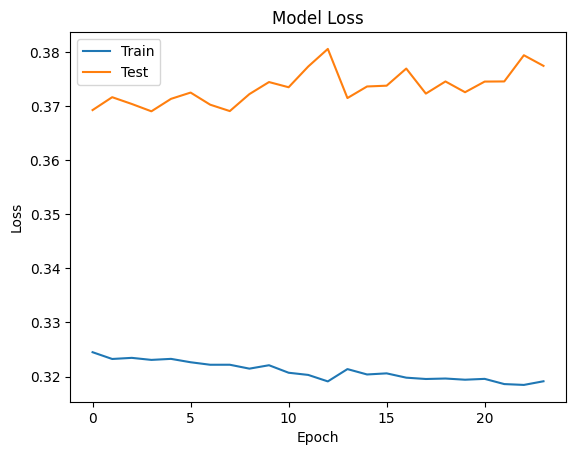

In [54]:
# Plot the summary history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
# Make prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
# Make the confusion matrix
from sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1502,   93],
       [ 212,  193]])

In [58]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8475